In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('Blinkit Grocery Data.csv')
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [8]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [9]:
df['Item Fat Content']=df['Item Fat Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [10]:
print(df['Item Fat Content'].unique())


['Regular' 'Low Fat']


## KPI Requirements

In [11]:
total_Sales = df['Sales'].sum()
print(f"Total Sales: {total_Sales/1000000:.2f} M")

average_Sales = df['Sales'].mean()
print(f"Average Sales: {average_Sales:.0f} ")

items_Sold = df['Item Identifier'].count()
print("Items Sold:",items_Sold)

average_Rating = df['Rating'].mean()
print(f"Average Rating: {average_Rating:.2f}")


Total Sales: 1.20 M
Average Sales: 141 
Items Sold: 8523
Average Rating: 3.97


## Charts Requirements

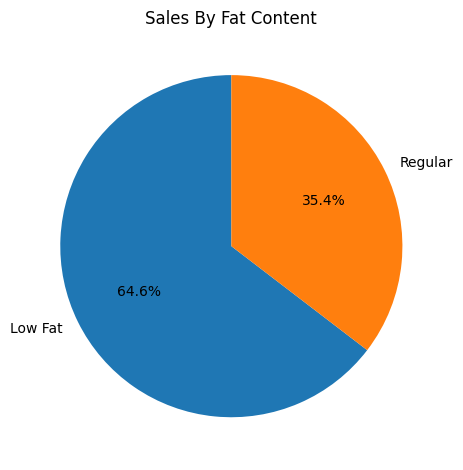

In [12]:
fat_content_sales = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(fat_content_sales.values,labels=fat_content_sales.index,autopct='%1.1f%%',startangle=90)
plt.title('Sales By Fat Content')
plt.tight_layout()
plt.show()

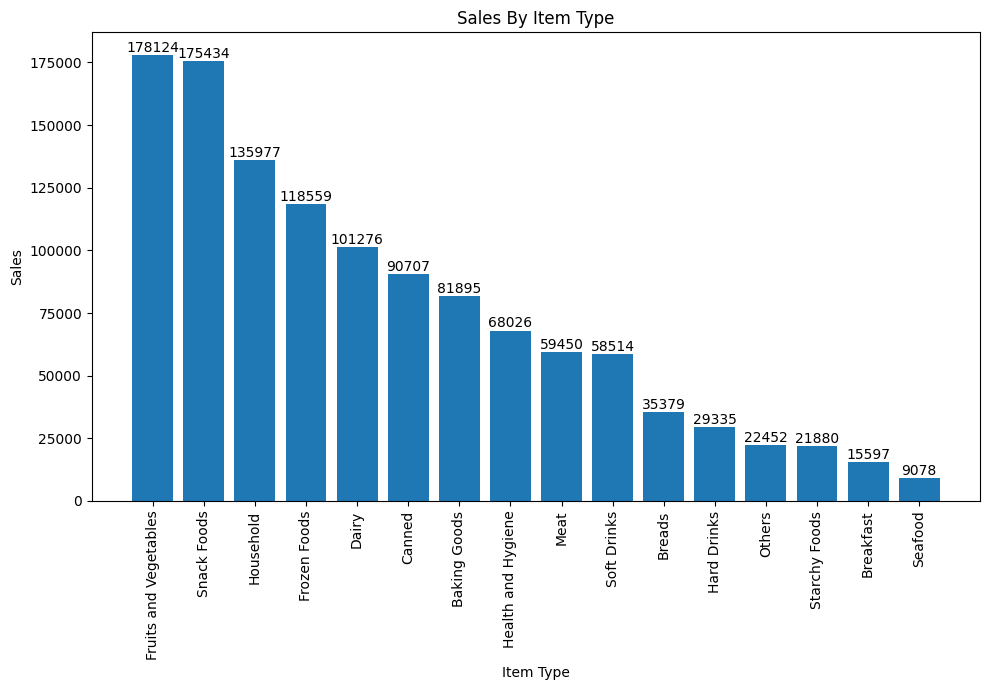

In [14]:
item_type_sales = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,7))
bars = plt.bar(item_type_sales.index,item_type_sales.values,label='sales by item type')
plt.title('Sales By Item Type')
plt.xlabel('Item Type')
plt.ylabel('Sales')
plt.xticks(rotation=90)
for bar in bars:
    plt.text(bar.get_x() +bar.get_width() / 2,
             bar.get_height() + 50,
             f'{bar.get_height():.0f}',
             ha = 'center',
             va = 'bottom')
    
plt.tight_layout()
plt.show()

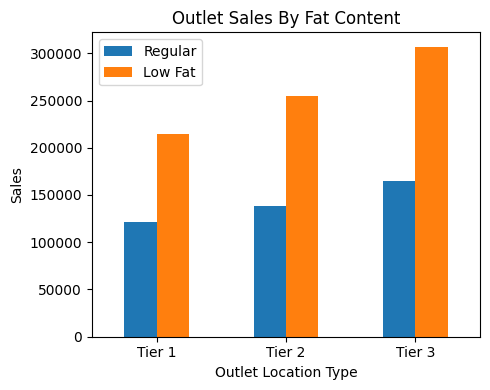

In [15]:
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
# Reorders the columns so that Regular comes first, then Low Fat.
grouped = grouped[['Regular','Low Fat']]
ax = grouped.plot(kind='bar',figsize=(5,4),title='Outlet Sales By Fat Content')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.xlabel('Outlet Location Type')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

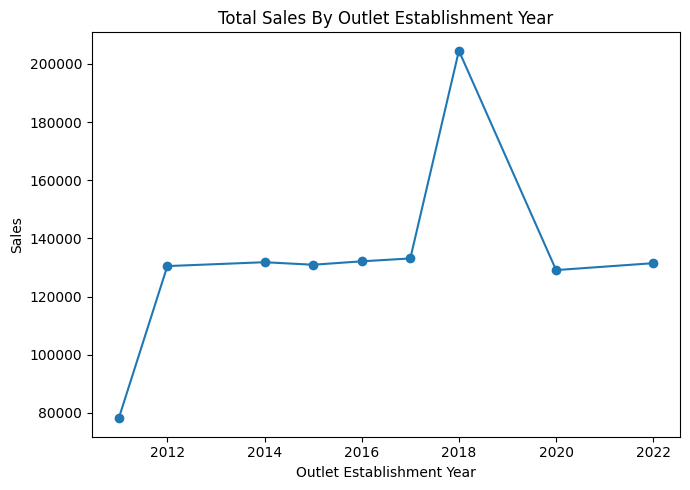

In [16]:
est_year = df.groupby('Outlet Establishment Year')['Sales'].sum()

plt.figure(figsize=(7,5))
plt.plot(est_year.index,est_year.values,label='sales',marker='o')
plt.title('Total Sales By Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

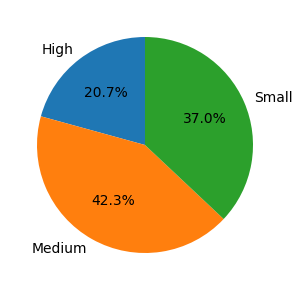

In [18]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(7,3))
plt.pie(sales_by_size.values,labels=sales_by_size.index,autopct='%1.1f%%',startangle=90)
plt.tight_layout()
plt.show()

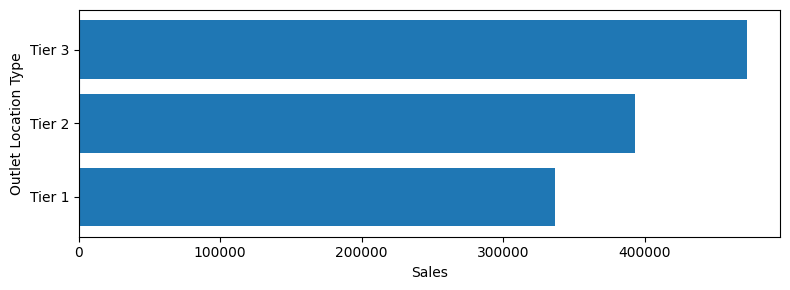

In [19]:
outlet_type = df.groupby('Outlet Location Type')['Sales'].sum()

plt.figure(figsize=(8,3))
plt.barh(outlet_type.index,outlet_type.values)
plt.ylabel('Outlet Location Type')
plt.xlabel('Sales')
plt.tight_layout()
plt.show()